# LEVEL-3 -- TASK-1 : Predictive Modeling

- Build a regression model to predict the aggregate rating of a restaurant based on available features.
- Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.
- Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Dropping the null values
df = df.dropna()

In [4]:
# Checking for Missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
# Converting Binary categorical variables to numeric using one-hot encoding
# "Has Table Booking" column  
df['Has Table booking'] = np.where(df['Has Table booking'] == 'Yes', 1, 0)
# "Has Online Delivery" column
df['Has Online delivery'] = np.where(df['Has Online delivery'] == 'Yes', 1, 0)
# Is delivering now column
df['Is delivering now'] = np.where(df['Is delivering now'] == 'Yes', 1, 0)
# Switch to order menu
df['Switch to order menu'] = np.where(df['Switch to order menu'] == 'Yes', 1, 0)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229


### Predictive Modeling

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

In [7]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
df['Is delivering now'].value_counts()

Is delivering now
0    9508
1      34
Name: count, dtype: int64

### Identifying Input(X) and Target(y) Features

In [9]:
# Identifying Input and Output Features
X = df.drop(columns=['Aggregate rating', 'Restaurant ID', 'Restaurant Name', 'Country Code', 
                            'City', 'Address','Locality', 'Locality Verbose', 'Longitude',
                            'Latitude', 'Cuisines', 'Switch to order menu', 'Rating color', 'Rating text', 'Currency', 'Is delivering now'])

y = df['Aggregate rating']

### Spliting the data into Train and Test

In [10]:
# Train data and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [11]:
# Shape of the splited data
print('Train data: ',X_train.shape, y_train.shape)

print('Test data: ',X_test.shape, y_test.shape)

Train data:  (7633, 5) (7633,)
Test data:  (1909, 5) (1909,)


In [12]:
X_train_OHE = X_train[['Has Table booking', 'Has Online delivery']]
X_train_OHE.head()

,Has Table booking,Has Online delivery
3022,1,0
9514,0,0
9459,0,0
3660,0,1
2286,0,0


In [13]:
X_train_num = X_train[['Average Cost for two', 'Price range', 'Votes']]
X_train_num.head()

,Average Cost for two,Price range,Votes
3022,1200,3,673
9514,4000,4,203
9459,300,4,180
3660,1000,3,697
2286,1650,4,222


In [14]:
X_test_OHE = X_test[['Has Table booking', 'Has Online delivery']]
X_test_OHE.head()

,Has Table booking,Has Online delivery
9276,0,0
1620,0,0
4219,0,1
3348,0,0
90,0,0


In [15]:
X_test_num = X_test[['Average Cost for two', 'Price range', 'Votes']]
X_test_num.head()

,Average Cost for two,Price range,Votes
9276,150000,3,22
1620,200,1,16
4219,300,1,155
3348,450,1,8
90,25,2,147


**Observation:**
- As the data may be in different scales the results may effect.
- So, standardization should be applied to convert into same scaling.

### Data Preparation on train data

In [16]:
scaler = StandardScaler()

# After the scalling column names will be lost 
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                         columns= X_train_num.columns,
                                         index = X_train_num.index)
X_train_num_rescaled.head()

,Average Cost for two,Price range,Votes
3022,0.001050,1.308062,1.181206
9514,0.166191,2.405494,0.103081
9459,-0.052031,2.405494,0.050321
3660,-0.010746,1.308062,1.236259
2286,0.027590,2.405494,0.146664


In [17]:
X_train_rescaled = pd.concat([X_train_num_rescaled,X_train_OHE], axis=1)
X_train_rescaled.head()

,Average Cost for two,Price range,Votes,Has Table booking,Has Online delivery
3022,0.001050,1.308062,1.181206,1,0
9514,0.166191,2.405494,0.103081,0,0
9459,-0.052031,2.405494,0.050321,0,0
3660,-0.010746,1.308062,1.236259,0,1
2286,0.027590,2.405494,0.146664,0,0


### Data Preparation on test data 

In [18]:
# Standardising the Numerical columns
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                         columns= X_test_num.columns,
                                         index = X_test_num.index)
X_test_num_rescaled.head()

,Average Cost for two,Price range,Votes
9276,8.777140,1.308062,-0.312113
1620,-0.057929,-0.886802,-0.325876
4219,-0.052031,-0.886802,-0.007026
3348,-0.043185,-0.886802,-0.344227
90,-0.068251,0.210630,-0.025377


In [19]:
X_test_rescaled = pd.concat([X_test_num_rescaled,X_test_OHE], axis=1)
X_test_rescaled.head()

,Average Cost for two,Price range,Votes,Has Table booking,Has Online delivery
9276,8.777140,1.308062,-0.312113,0,0
1620,-0.057929,-0.886802,-0.325876,0,0
4219,-0.052031,-0.886802,-0.007026,0,1
3348,-0.043185,-0.886802,-0.344227,0,0
90,-0.068251,0.210630,-0.025377,0,0


### Build a regression model to predict the aggregate rating of a restaurant based on available features.

### Experiment with different algorithms

In [21]:
linear_reg = LinearRegression()

linear_reg.fit(X_train_rescaled, y_train)
y_predict = linear_reg.predict(X_test_rescaled)

print('Model : Linear Regression')
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_predict))
print('R Square: ', metrics.r2_score(y_test, y_predict))

Model : Linear Regression
Mean Squared Error:  1.7108648051336286
R Square:  0.25855488151077655


In [22]:
decision_tree = DecisionTreeRegressor()

decision_tree.fit(X_train_rescaled, y_train)
y_predicted = decision_tree.predict(X_test_rescaled)

print('Model : Decision Tree')
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_predicted))
print('R Square: ',metrics.r2_score(y_test, y_predicted))

Model : Decision Tree
Mean Squared Error:  0.19056549532175945
R Square:  0.9174137805425464


In [23]:
random_forest = RandomForestRegressor()

random_forest.fit(X_train_rescaled, y_train)
y_predict = random_forest.predict(X_test_rescaled)

print('Model : RandomForest')
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_predict))
print('R Square: ', metrics.r2_score(y_test, y_predict))

Model : RandomForest
Mean Squared Error:  0.12791437587335688
R Square:  0.9445651758740291


## Insights from TASK-1

- Model Performance Evaluation:

        - We assessed the performance of three regression models—Linear Regression, Decision Tree, and Random Forest—in predicting restaurant aggregate ratings based on available features.

- Model Comparison:

        - Linear Regression:
          Mean Squared Error (MSE): 1.71086
          R-square: 0.2585

        - Decision Tree:
          Mean Squared Error (MSE): 0.19145
          R-square: 0.9149

        - Random Forest:
          Mean Squared Error (MSE): 0.12809
          R-square: 0.9442

- Optimal Model Selection:

        - Among the three models, Random Forest demonstrated superior performance:              
          Lowest MSE: 0.12809                
          Highest R-square: 0.9442

- Therefore, the Random Forest algorithm is the preferred choice for this dataset.

# TASK-2 - : Customer Preference Analysis

- Analyze the relationship between the type of cuisine and the restaurant's rating.
- Identify the most popular cuisines among customers based on the number of votes.
- Determine if there are any specific cuisines that tend to receive higher ratings.

### Relationship between the type of cuisine and the restaurant's rating.

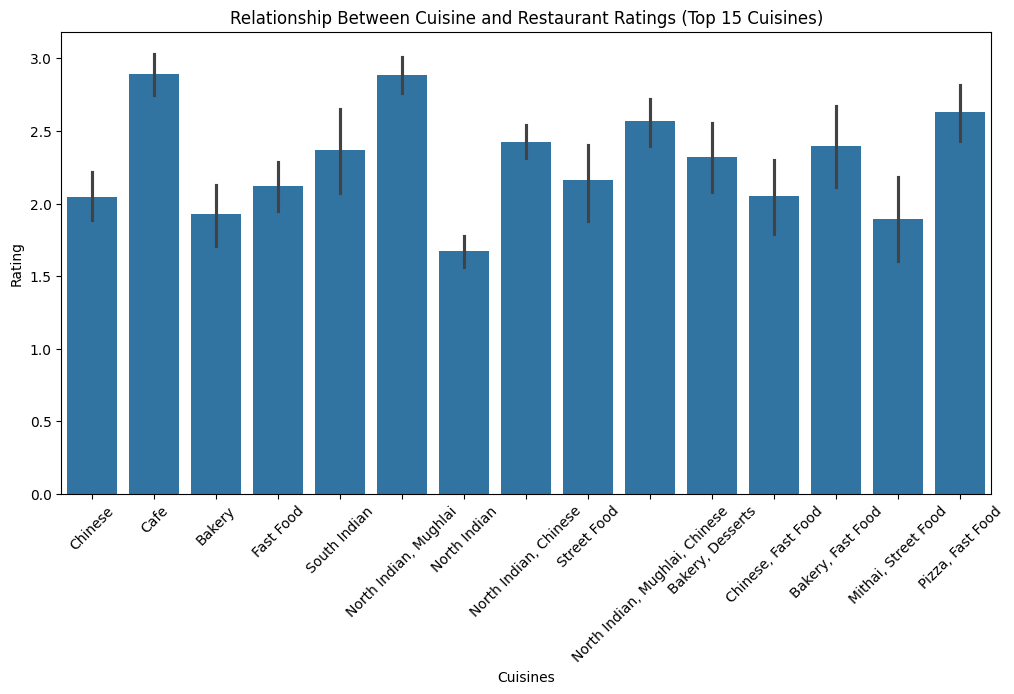

In [25]:
# There are many cuisine names in the data. Therefore, taken only the top 15 cuisines
top_cuisines = df['Cuisines'].value_counts().nlargest(15).index

df_filtered = df[df['Cuisines'].isin(top_cuisines)]
plt.figure(figsize=(12, 6))
sns.barplot(data=df_filtered, x='Cuisines', y='Aggregate rating')

plt.title(f'Relationship Between Cuisine and Restaurant Ratings (Top {15} Cuisines)')
plt.xlabel('Cuisines')

plt.ylabel('Rating')
plt.xticks(rotation=45)

plt.show()

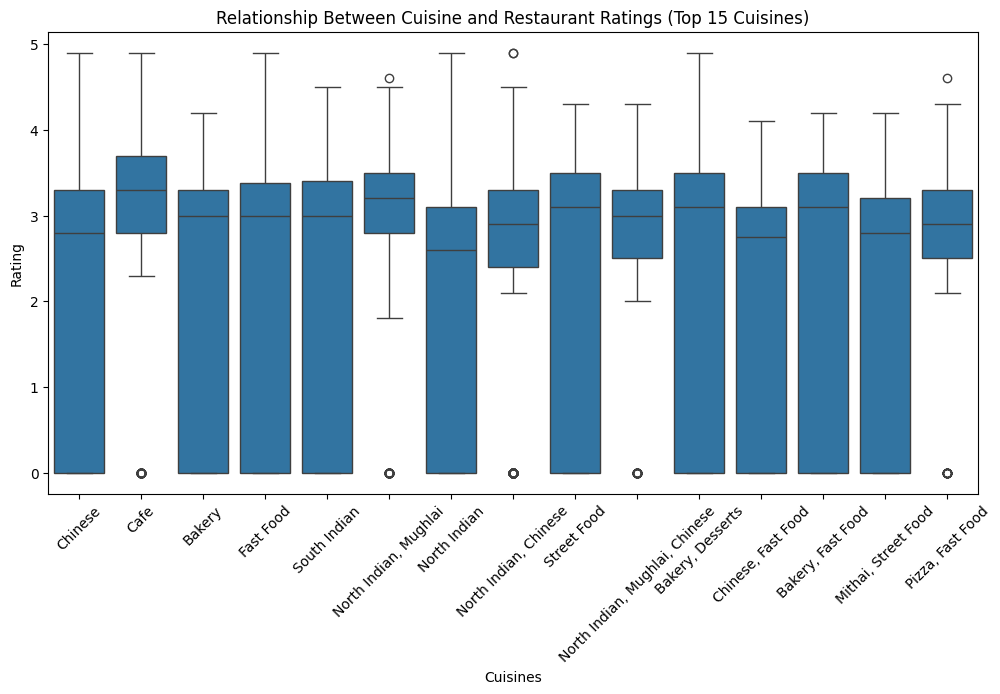

In [27]:
# There are many cuisine names in the data. Therefore, taken only the top 15 cuisines
top_cuisines = df['Cuisines'].value_counts().nlargest(15).index

df_filtered = df[df['Cuisines'].isin(top_cuisines)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Cuisines', y='Aggregate rating')

plt.title(f'Relationship Between Cuisine and Restaurant Ratings (Top {15} Cuisines)')
plt.xlabel('Cuisines')

plt.ylabel('Rating')
plt.xticks(rotation=45)

plt.show()

### Most popular cuisines among customers based on the number of votes.

In [28]:
# Identify the most popular cuisines among customers based on the number of votes.
top_cuisines = df.groupby('Cuisines')['Votes'].sum().nlargest(15)

print("Top Cuisines by Number of Votes")
print(top_cuisines)

Top Cuisines by Number of Votes
Cuisines
North Indian, Mughlai                         53747
North Indian                                  46241
North Indian, Chinese                         42012
Cafe                                          30657
Chinese                                       21925
North Indian, Mughlai, Chinese                20115
Fast Food                                     17852
South Indian                                  16433
Mughlai, North Indian                         15275
Italian                                       14799
European, Mediterranean, North Indian         12541
Modern Indian                                 12355
Chinese, Thai                                 12354
Pizza                                         11537
Continental, American, Asian, North Indian    11404
Name: Votes, dtype: int64


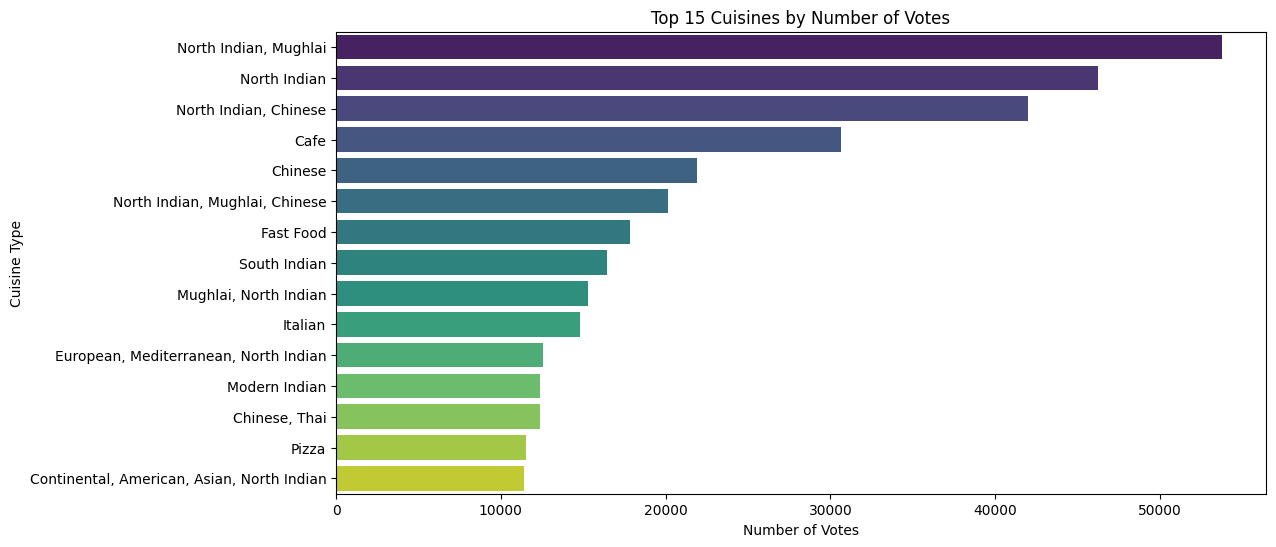

In [29]:
# Identify the most popular cuisines among customers based on the number of votes.
top_cuisines = df.groupby('Cuisines')['Votes'].sum().nlargest(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title('Top 15 Cuisines by Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Cuisine Type')
plt.show()

### Specific cuisines that tend to receive higher ratings.

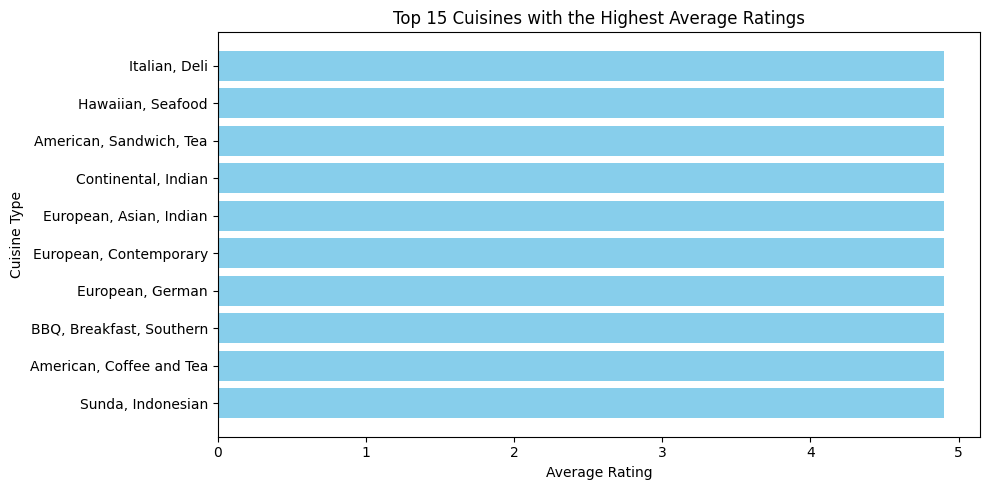

In [33]:
# Determine if there are any specific cuisines that tend to receive higher ratings.
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='skyblue')

plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 15 Cuisines with the Highest Average Ratings')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

plt.show()

## Insights from TASK-2

- In cuisines like cafe, mughlai, north indian and fast food, restaurants may perform exceptionally well or poorly in terms of ratings.
- North indian and Chinese cuisines are with more varied ratings.
- Cafe and Fast food cuisines are with consistent ratings.
- Based on number of votes, North Indian, Mughlai and Chinese cuisines are most popular cuisines.
- Based on highest average rating, Italian, Hawaiian, Seafood, Tea, Sandwich, Continental and Indian are most popular cuisines.


# TASK-3 - Data Visualization

- Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).
- Compare the average ratings of different cuisines or cities using appropriate visualizations.
- Visualize the relationship between various features and the target variable to gain insights.


### Distribution of Ratings

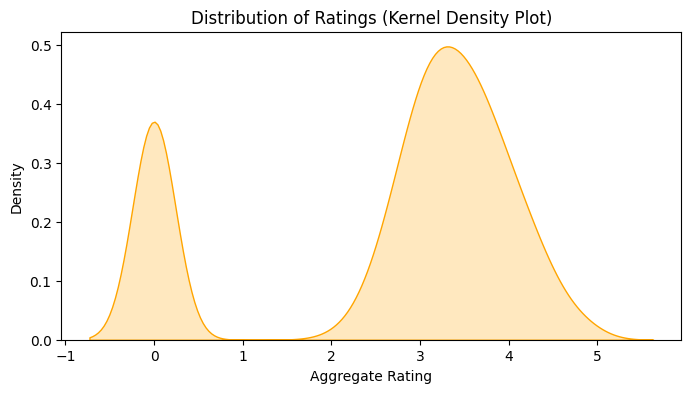

In [34]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df['Aggregate rating'], fill=True, color='orange')
plt.title('Distribution of Ratings (Kernel Density Plot)')
plt.xlabel('Aggregate Rating')
plt.ylabel('Density')
plt.show()

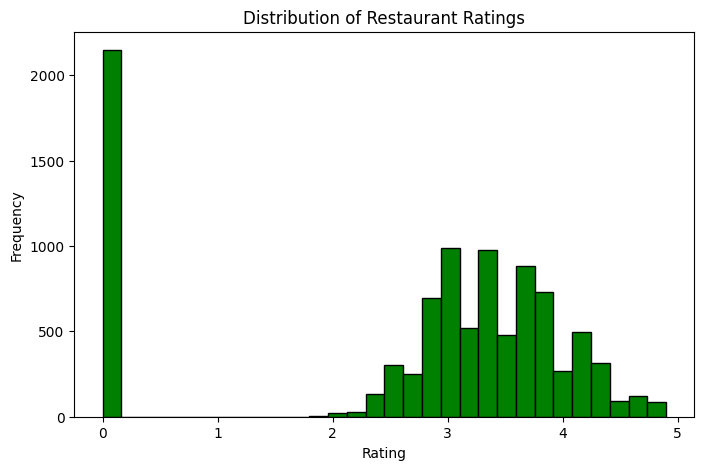

In [35]:
plt.figure(figsize=(8, 5))
plt.hist(df['Aggregate rating'], bins=30, color='green', edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')
plt.show()

### Average ratings for different cuisines

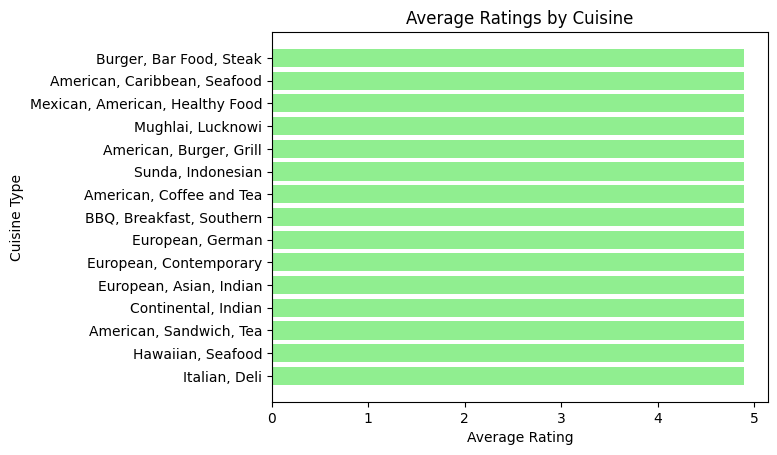

In [36]:
average_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

plt.barh(cuisine_ratings['Cuisines'][:15], cuisine_ratings['Aggregate rating'][:15], color='lightgreen')

plt.title('Average Ratings by Cuisine')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.show()

### Average ratings for different Cities

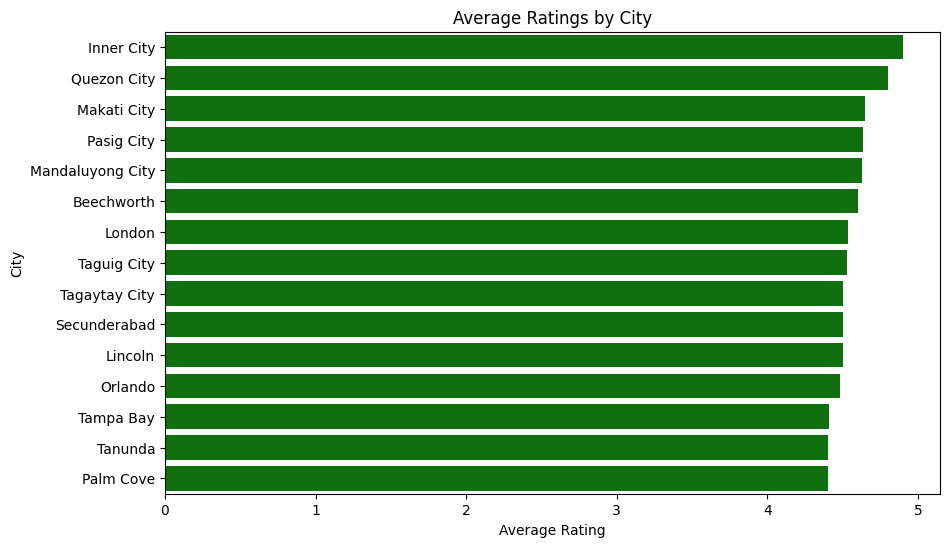

In [37]:
average_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings.values[:15], y=average_ratings.index[:15], color='green')
plt.title('Average Ratings by City')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

### Relationship between various features and the target variable

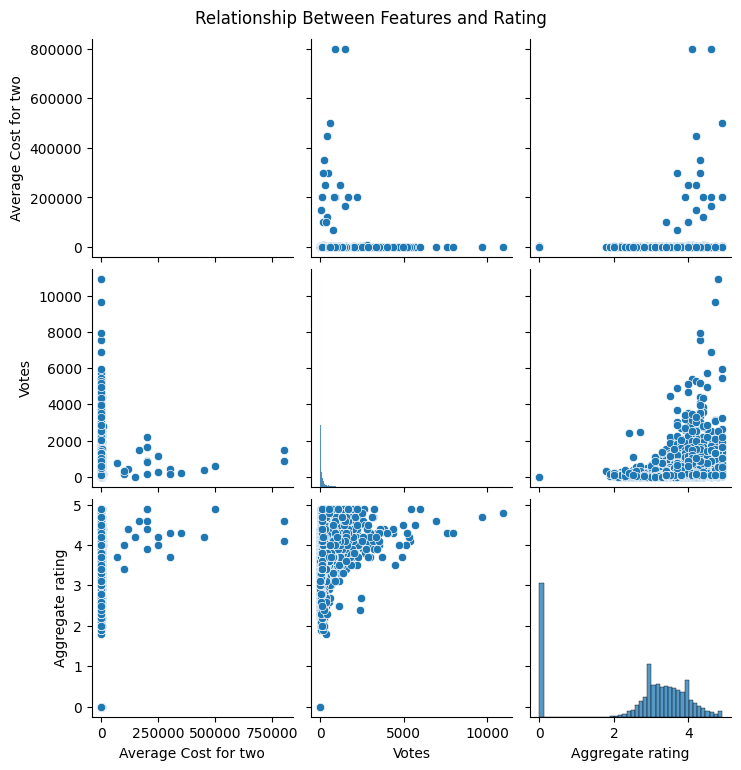

In [38]:
# Visualize the relationship between various features and the target variable to gain insights.
sns.pairplot(data=df, vars=['Average Cost for two', 'Votes', 'Aggregate rating'])
plt.suptitle("Relationship Between Features and Rating", y=1.02)

plt.show()

### Insights from TASK-3

- Distribution of restaurants ratings is negatively skewed.
- Based on highest average rating, Italian, Hawaiian, Seafood, Tea, Sandwich, Continental and Indian cuisines are the most popular cuisines.
- Based on highest average rating, Inner City, Quezon City, Makati City etc. are the most popular cities.
- Votes and restaurants ratings are positively correlated.

